In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.DataFrame(np.random.randn(5,3),
               columns=["c1","c2","c3"])
df
df.ix[0,0]=np.nan #None
df

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,c1,c2,c3
0,NaN,-0.468533,-0.296959
1,-1.640912,-0.659622,0.649582
2,-1.081936,0.633491,-0.557416
3,0.145642,2.129474,-0.434349
4,0.265869,-0.510881,-0.486798


In [10]:
import warnings
warnings.filterwarnings(action='ignore')
df.ix[1,['c1', 'c3']]=np.nan
df
df.ix[2,['c2']]=None
df.ix[3,['c2']]=None
df.ix[4,['c3']]=None
df
#NaN이 들어가 있는 자리를 모두 0으로 대체
df.fillna(0)
df.fillna(method="ffill")

,c1,c2,c3
0,NaN,-0.468533,-0.296959
1,NaN,-0.659622,-0.296959
2,-1.081936,-0.659622,-0.557416
3,0.145642,-0.659622,-0.434349
4,0.265869,-0.510881,-0.434349


In [53]:
df
df.fillna(df.mean())
df.where(pd.notnull(df), df.mean(),axis="columns")

df.fillna(df.mean()['c1'])

,c1,c2,c2p
0,1,6.0,6.0
1,2,3.0,2.0
2,3,8.0,8.0
3,4,3.0,4.0
4,5,10.0,10.0


In [32]:
arr=np.array([1,2,3,10,20,30,0.1,0.2])
np.min(arr) #최소값
np.argmin(arr) #최소값의 index
np.max(arr) #최대값
np.argmax(arr) #최대값의 index
np.where(arr<1) 
#where함수는 조건문 사용->출력값:인덱스
np.where(arr>=10,0,arr)
#np.where(조건, 참, 거짓)
np.where(arr>=10, arr*0.1, arr)

array([1. , 2. , 3. , 1. , 2. , 3. , 0.1, 0.2])

In [40]:
df.fillna(df.mean()['c1':'c2'])

,c1,c2,c3
0,-0.223475,-0.468533,-0.296959
1,-0.223475,-0.659622,NaN
2,-1.081936,-0.546345,-0.557416
3,0.145642,-0.546345,-0.434349
4,0.265869,-0.510881,NaN


In [47]:
df=pd.DataFrame({'c1':[1,2,3,4,5],
             'c2':[6,7,8,9,10]})
df.ix[[1,3], ['c2']]=np.nan
df
#c2p 열에는 c2열 값이 notnull이면 c2열 값을,
#c2열 값이 null이면 c1열 값으로 채우고자 함
df['c2p']=np.where(pd.notnull(df['c2'])==True,
                   df['c2'],df['c1'])
df
for i in df.index:
    if pd.notnull(df.ix[i,'c2'])==True:
        df.ix[i,'c2p']=df.ix[i,'c2']
    else:
        df.ix[i,'c2p']=df.ix[i,'c1']
df
#반복문으로 변경

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [54]:
#dropna 메서드: 열(axis=1)/행(axis=0) 제거
df=pd.DataFrame({'c1':[1,2,3,4,5],
             'c2':[6,7,8,9,10]})
df.ix[[1,3], ['c2']]=np.nan
df

,c1,c2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [57]:
df.dropna(axis=0) #결측값이 있는 행 전체 제거
df.dropna(axis=1) #결측값이 있는 열 전체 제거
df[['c1','c2']].dropna()#df.dropna(axis=0)
#axis=0 default

,c1,c2
0,1,6.0
2,3,8.0
4,5,10.0


In [68]:
#결측값 보간(interpolate)
"""
시계열데이터에 대해 선형적으로 비례하는 값
이미지 보간 : 그라데이션과 비슷
"""
from datetime import datetime
#datetime 모듈에 있는 datetime 함수
dateStr=['1/13/2020','1/16/2020',
         '1/17/2020','1/20/2020']
dates=pd.to_datetime(dateStr)
dates

DatetimeIndex(['2020-01-13', '2020-01-16', '2020-01-17', '2020-01-20'], dtype='datetime64[ns]', freq=None)

In [69]:
ts=pd.Series([1,np.nan, np.nan, 10], index=dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [70]:
tslr=ts.interpolate()#method='values' default
#method=values:선형적으로 비례하게 결측값 보간
tslr

2020-01-13     1.0
2020-01-16     4.0
2020-01-17     7.0
2020-01-20    10.0
dtype: float64

In [72]:
tsTime=ts.interpolate(method='time',limit=1)
tsTime

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17          NaN
2020-01-20    10.000000
dtype: float64

In [73]:
#na를 대체 : fillna, replace
#fillna:na를 다른 값으로 대체
#replace:na 뿐만아니라 다른 모든 값에 대해서도 대체 가능
#결측값/실측값 대상 데이터 교체

In [83]:
s=pd.Series([1,2,3,4,np.nan])
s
#replace:결측값/실측값 변경
s.replace(3,9) #3->9
s.replace(np.nan,5) #nan -> 5

s=pd.Series([1,2,3,1,np.nan])
s.replace([1,2,3], [6,7,8])
s.replace([1,2,3,np.nan],[10,20,30,99])

0    10.0
1    20.0
2    30.0
3    10.0
4    99.0
dtype: float64

In [87]:
s
s.replace({1:5,3:30,np.nan:99}) #{원래값:변경값}

0     5.0
1     2.0
2    30.0
3     5.0
4    99.0
dtype: float64

In [91]:
#데이터프레임에서 replace 적용
df=pd.DataFrame({'c1':['aaa','b','c','d'],
                 'c2':[1,2,3,4],
                 'c3':[5,6,7,np.nan]
                })
df.replace({'c1':'aaa'}, {'c1':'bbb'})
df.replace({'c3':np.nan}, {'c3':99})

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,99.0


In [92]:
#병합: 중복 데이터 발생
#중복데이터 여부:duplicated()
#중복데이터 처리:drop_duplicates()한개만 남겨놓고 나머지는 제거

In [103]:
df=pd.DataFrame({
    'k1':['b','b','b','c','c'],
    'k2':['x','y','y','x','z'],
    'col':[10,20,30,40,50]
})
df

,k1,k2,col
0,b,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [104]:
df.duplicated(['k1'])
df.duplicated(['k2'])
df.duplicated(['k1','k2'])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [107]:
#df.duplicated(['k1'],keep='first')#keep='first' default
#df.duplicated(['k1'],keep='last')
df.duplicated(['k1'],keep=False) #중복은 모두 True

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [114]:
df
#중복값 제거(1개만 살리고 나머지 중복은 제거)
df.drop_duplicates(['k1'],keep="first")#defalult:kepp=first
df.drop_duplicates(['k1'],keep="last")
df.drop_duplicates(['k1'],keep=False)

,k1,k2,col


In [115]:
# 유일한값 : unique()
# 유일한값 개수 세기 : value_counts()

In [126]:
df=pd.DataFrame({
    'a':['a1','a1','a2','a2','a3'],
    'b':['b1','b1','b2','b2',np.nan],
    'c':[1,1,3,4,4]    
})
df['a'].unique()
df['b'].unique()
df['c'].unique()
#help(pd.Series.unique)

array([1, 3, 4], dtype=int64)

In [138]:
#유일값 개수 세기
#elp(pd.Series.value_counts)
#normalize=디폴트(False):개수, True:상대비율
#df['a'].value_counts(normalize=False)
#normalize=False:디폴트
#sort=True:개수 기준 정렬
df['a'].value_counts(normalize=False,
                     sort=True,
                     ascending=False)

a1    2
a2    2
a3    1
Name: a, dtype: int64

In [142]:
df['c'].value_counts(sort=True, ascending=False)
#defalut:sort=True, ascending=False
#유일한 값의 개수를 기준으로 내림차순
df['c'].value_counts(sort=True, ascending=True)
#유일한 값의 개수를 기준으로 오림차순

df['c'].value_counts(sort=False)
#정렬 기준이 없음

1    2
3    1
4    2
Name: c, dtype: int64

In [143]:
df

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [152]:
df['b'].value_counts()
#default : dropna=True
df['b'].value_counts(dropna=False)

df['c'] #1 1 3 4 4
#group별 데이터 개수 세기
df['c'].value_counts(bins=[0,1,2,3,4,5] ,sort=False)
#( ):개구간,  [ ]:폐구간   

#동일한 결과를 도출하는 코드
# res=pd.cut(df['c'],bins=[0,1,2,3,4,5])
# pd.value_counts(res)

(3, 4]    2
(0, 1]    2
(2, 3]    1
(4, 5]    0
(1, 2]    0
Name: c, dtype: int64

In [153]:
#변수들 간 척도가 다른 경우 데이터 표준화
#모집단:전체 집단, 
#모집단에서 표본추출->표본집단 평균, 표준편차... -> 
# -> 통계량 => 모평균,모분산(모수, parameter) 추정

"""
모수적방법
중심극한정리:무작위로 복원추출하면,연속형
자료의 평균에 대한 분포는 정규분포를 띈다면
-30개 이상의 표본의 경우에 정규분포를 따른다.가정

비모수적방법
-10개 미만의 표본의 경우에는 모수적 방법을 사용 못함
-자료를 크기로 나열-> 순위 매김=>차이 비교

"""

'\n모수적방법\n중심극한정리:무작위로 복원추출하면,연속형\n자료의 평균에 대한 분포는 정규분포를 띈다면\n-30개 이상의 표본의 경우에 정규분포를 따른다.가정\n\n비모수적방법\n-10개 미만의 표본의 경우에는 모수적 방법을 사용 못함\n-자료를 크기로 나열-> 순위 매김=>차이 비교\n\n'

In [155]:
"""
표준화 : (각데이터-평균) / 표준편차
모집단이 정규분포를 따르는 경우에,
평균:0, 표준편차:1인 표준정규분포로 표준화하는 작업
1)numpy 2) scipy.stats:zscore
3)sklearn.preprocessing
"""


'\n표준화 : (각데이터-평균) / 표준편차\n모집단이 정규분포를 따르는 경우에,\n평균:0, 표준편차:1인 표준정규분포로 표준화하는 작업\n1)numpy 2) scipy.stats:zscore\n3)sklearn.preprocessing\n'

In [4]:
from numpy import *
import numpy as np
import pandas as pd

In [5]:
# data=np.random.randint(30, size=(6,5))
# data
data=np.random.randint(30, size=(6,5))
data

array([[ 2,  5,  1, 23,  1],
       [15,  4, 18, 17, 19],
       [ 5, 19, 29, 16, 23],
       [22, 24, 27, 15, 26],
       [26,  9,  9, 26,  4],
       [ 0, 14,  3, 25, 26]])

In [11]:
np.std(data,axis=1)

array([ 8.428523  ,  5.46260011,  7.98999374,  4.26145515,  9.32523458,
       10.78146558])

In [7]:
#표준화=(각 데이터-평균(각 열))/ std(각 열)
#np.mean(data)     전체 평균:2
#np.mean(data, axis=0)  #각 열 평균
#np.mean(data, axis=1)  #각 행 평균
print(data)
print("="*30)
print(np.mean(data, axis=0))
print("="*30)
#print(data-np.mean(data, axis=0))

std_data=(data-np.mean(data, axis=0))/np.std(data,axis=0)
print(std_data)
#np.std(data) 전체 data에 대한 표준편차
#np.std(data,axis=0) #각 열에 대한 표준편차


[[ 2  5  1 23  1]
 [15  4 18 17 19]
 [ 5 19 29 16 23]
 [22 24 27 15 26]
 [26  9  9 26  4]
 [ 0 14  3 25 26]]
[11.66666667 12.5        14.5        20.33333333 16.5       ]
[[-0.968822   -1.03101509 -1.22939127  0.59794807 -1.51807653]
 [ 0.33407655 -1.16848377  0.31873107 -0.74743509  0.24485105]
 [-0.6681531   0.89354642  1.32045729 -0.97166562  0.63661274]
 [ 1.03563731  1.58088981  1.13832525 -1.19589615  0.930434  ]
 [ 1.43652918 -0.48114038 -0.50086311  1.27063966 -1.22425527]
 [-1.16926793  0.20620302 -1.04725923  1.04640913  0.930434  ]]


In [187]:
#print(std_data)
print(np.mean(std_data, axis=0))
print(np.std(std_data, axis=0))
print(np.var(std_data, axis=0))

[ 2.77555756e-17 -7.40148683e-17  3.46944695e-16  1.07552856e-16
  1.85037171e-17]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


In [188]:
print(std_data)

[[-1.37783798 -0.57792049  0.04993762  0.71013365  1.10738807]
 [-0.15309311 -0.57792049  0.64918902 -1.23501504 -1.36794997]
 [-0.91855865  1.42257352 -2.04744229  0.98801203  1.49823092]
 [ 0.61237244  1.28920725  0.64918902  0.98801203 -0.19542142]
 [ 1.6840242  -0.31118796  0.94881472 -1.4202673  -0.71654522]
 [ 0.15309311 -1.24475183 -0.24968808 -0.03087538 -0.32570237]]


In [189]:
import scipy.stats as ss

In [190]:
data_ss=ss.zscore(data)
data_ss

array([[-1.37783798, -0.57792049,  0.04993762,  0.71013365,  1.10738807],
       [-0.15309311, -0.57792049,  0.64918902, -1.23501504, -1.36794997],
       [-0.91855865,  1.42257352, -2.04744229,  0.98801203,  1.49823092],
       [ 0.61237244,  1.28920725,  0.64918902,  0.98801203, -0.19542142],
       [ 1.6840242 , -0.31118796,  0.94881472, -1.4202673 , -0.71654522],
       [ 0.15309311, -1.24475183, -0.24968808, -0.03087538, -0.32570237]])

In [191]:
from sklearn.preprocessing import *

In [192]:
ss_data=StandardScaler().fit_transform(data)
ss_data

array([[-1.37783798, -0.57792049,  0.04993762,  0.71013365,  1.10738807],
       [-0.15309311, -0.57792049,  0.64918902, -1.23501504, -1.36794997],
       [-0.91855865,  1.42257352, -2.04744229,  0.98801203,  1.49823092],
       [ 0.61237244,  1.28920725,  0.64918902,  0.98801203, -0.19542142],
       [ 1.6840242 , -0.31118796,  0.94881472, -1.4202673 , -0.71654522],
       [ 0.15309311, -1.24475183, -0.24968808, -0.03087538, -0.32570237]])

In [193]:
#예외적인 값(이상치, 특이값, outlier)이 들어있는 데이터 표준화
#표준정규분포로의 표준화:이상치,특이값이 없어야 한다는 가정 필요
# z=(x-mean)/std

#이상치가 데이터에 포함되어 있는 경우에는
#표준화를 어떻게?
#1)이상치, 특이값을 찾아서 제거
#2)중앙값(median), IQR을 이용하여 스케일링

In [194]:
#RobustScaler():이상치가 있는 데이터 표준화

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [13]:
mu, sigma=5, 2

In [14]:
x=mu+sigma*np.random.randn(100)
x

array([ 8.11939249,  6.55455022,  4.88673902,  7.63473117,  1.48417262,
        4.55242393,  4.70052019,  3.02804704,  4.79080631,  3.90334335,
        1.36199267,  5.97830804,  7.3907334 ,  1.17995843,  4.22784283,
        8.54545307,  4.34117335,  3.08912256,  5.34886617,  9.11187702,
        7.05621783,  3.95451829,  2.05357201,  6.94102888,  1.69768303,
        3.44094109,  5.40134135,  5.39908891,  9.26381888,  3.29637788,
        4.38951747,  6.14131498,  8.95950677,  2.3721787 ,  5.17820757,
        6.86049532,  2.82581445,  4.09410061, 10.21651783,  1.95696155,
        5.47488836,  5.80381816,  3.92877574,  2.0541373 ,  7.31496303,
        7.66729419,  6.99490012,  3.66497087,  3.40889064,  7.14642595,
        5.74441244,  5.47074078,  3.40391931,  5.82931435,  5.95400941,
        6.18183612,  4.61766778,  8.59191376,  6.74522179,  6.95785932,
        4.18543231,  3.78593293,  5.47530162,  2.23402299,  5.48587225,
        3.32446747,  4.75343055,  5.24295238,  3.15151087,  4.31

2.158433177030302

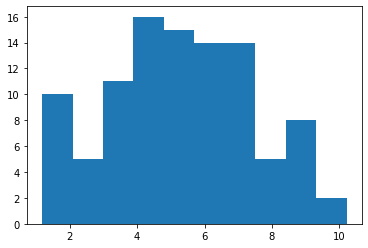

In [15]:
plt.hist(x)
np.mean(x)
np.std(x)

In [23]:
x[98:100]=100
x

array([  8.11939249,   6.55455022,   4.88673902,   7.63473117,
         1.48417262,   4.55242393,   4.70052019,   3.02804704,
         4.79080631,   3.90334335,   1.36199267,   5.97830804,
         7.3907334 ,   1.17995843,   4.22784283,   8.54545307,
         4.34117335,   3.08912256,   5.34886617,   9.11187702,
         7.05621783,   3.95451829,   2.05357201,   6.94102888,
         1.69768303,   3.44094109,   5.40134135,   5.39908891,
         9.26381888,   3.29637788,   4.38951747,   6.14131498,
         8.95950677,   2.3721787 ,   5.17820757,   6.86049532,
         2.82581445,   4.09410061,  10.21651783,   1.95696155,
         5.47488836,   5.80381816,   3.92877574,   2.0541373 ,
         7.31496303,   7.66729419,   6.99490012,   3.66497087,
         3.40889064,   7.14642595,   5.74441244,   5.47074078,
         3.40391931,   5.82931435,   5.95400941,   6.18183612,
         4.61766778,   8.59191376,   6.74522179,   6.95785932,
         4.18543231,   3.78593293,   5.47530162,   2.23

(array([ 8., 20., 33., 26., 10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

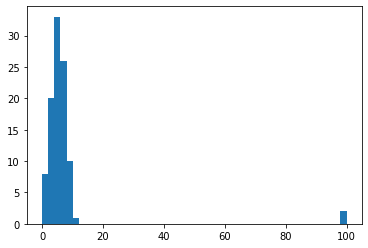

In [24]:
np.mean(x)
np.std(x)
#plt.hist(x)
plt.hist(x, bins=np.arange(0,102,2))

(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.4495446 ,  0.28642843,  1.02240146,  1.75837449,  2.49434752,
         3.23032055,  3.96629358,  4.70226661,  5.43823964,  6.17421267,
         6.9101857 ]),
 <a list of 10 Patch objects>)

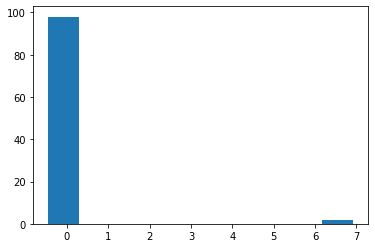

In [25]:
#type(x)   array
x=x.reshape(100,1) #(100,) -> (100,1)
#x=x.reshape(-1,1) #(100,) -> (100,1)
x.shape
ss_x=StandardScaler().fit_transform(x)
np.mean(ss_x)
np.std(ss_x)
plt.hist(ss_x)

(array([ 0.,  0.,  0.,  0.,  0.,  7., 10., 19., 22., 21., 11.,  7.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

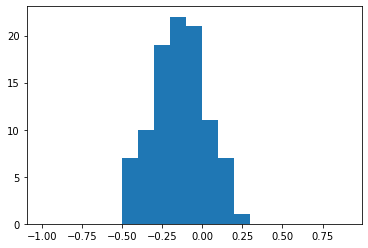

In [26]:
ss_x_z=ss_x[ss_x<5]
plt.hist(ss_x_z, bins=np.arange(-1,1,0.1))

In [27]:
#이상치 포함 데이터의 중앙값, IQR을 이용->표준화
np.median(x)
x
q1=np.percentile(x,25) #1사분위수, 3.730 
q3=np.percentile(x,75) #3사분위수, 6.577
iqr=q3-q1 #6.577 - 3.730 

(array([1., 2., 3., 6., 2., 5., 6., 5., 2., 7., 6., 6., 4., 3., 6., 6., 4.,
        2., 1.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

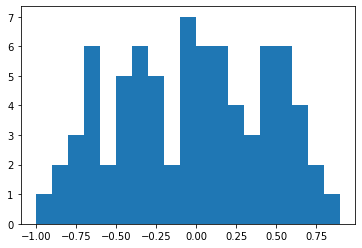

In [28]:
x_rs=RobustScaler().fit_transform(x)
x_rs
np.median(x_rs) #0
np.mean(x_rs) #0.65
np.std(x_rs) #4.71
#plt.hist(x_rs)

x_rs_z=x_rs[x_rs<10]
plt.hist(x_rs_z, bins=np.arange(-1,1,0.1))
